In [43]:
import pandas as pd

data = pd.read_csv('\machine learning\machine-learning-ex1\ex1\ex1data1.txt', header=None)

data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


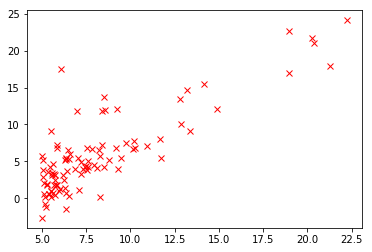

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
X = data.iloc[:,0]
y = data.iloc[:,1]
ax.plot(X, y, "rx")


In [45]:
import numpy as np

X = pd.DataFrame(data.iloc[:,0])
y = pd.DataFrame(data.iloc[:,1])
X.insert(0,column=None, value=np.ones(X.shape[0]))

y

,1
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
5,11.88600
6,4.34830
7,12.00000
8,6.59870
9,3.81660


In [46]:
theta = pd.DataFrame(np.zeros((2,1)))

def computeCost(X, y, theta):
    m = X.shape[0]
    predictions = np.dot(X, theta)
    deltas = predictions - y
    sqrErrors = (deltas**2).values.sum()
    return 1/(2*m) * sqrErrors

computeCost(X, y, theta)

32.072733877455676

In [47]:
J = computeCost(X, y, pd.DataFrame([-1,2]))
J

54.242455082012377

In [48]:
A = pd.DataFrame(np.random.randint(0,10,size=(3, 1)))
print(A)
print(A**2)
(A**2).values.sum()

   0
0  3
1  5
2  1
    0
0   9
1  25
2   1


35

In [49]:

def gradientDescent(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    J_hist = pd.DataFrame(np.zeros((1,num_iters)))
    X_trans = X.transpose()
    y_trans = y.transpose()
    for i in range(0,num_iters):
        theta_trans = theta.transpose()
        cost = np.dot(theta_trans, X_trans)
        diff = cost - y_trans
        delta = (1/m) * np.dot(diff, X)       
#         print('delta is {0}'.format(delta))
        theta = theta - (np.dot(alpha, delta.transpose()))
        J_hist[i] = computeCost(X, y, theta)
    return theta, J_hist
theta = pd.DataFrame([-1, 2])
theta, J_hist = gradientDescent(X, y, theta, 0.01, 1500)
theta
J_hist.transpose()

,0
0,6.731591
1,5.227803
2,5.177836
3,5.173818
4,5.171261
5,5.168759
6,5.166267
7,5.163784
8,5.161310
9,5.158845


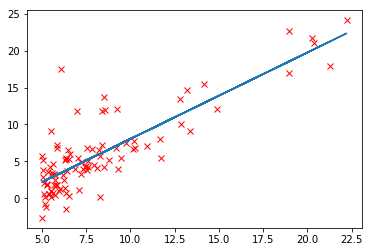

In [50]:
x_ax = X.iloc[:,1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
    
ax.plot(X.iloc[:,1], y, "rx")
ax.plot(x_ax, np.dot(X,theta), '-')

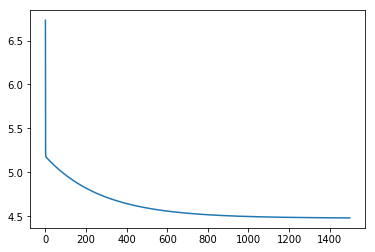

In [51]:
l = J_hist.shape[1]
x = np.arange(0,l,1)
plt.plot(x, J_hist.transpose())

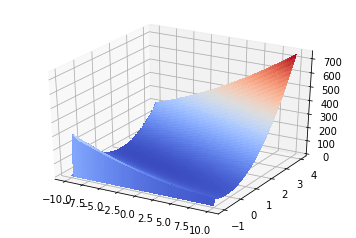

In [71]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)));
for i in range(1,len(theta0_vals)):
    for j in range(1, len(theta1_vals)):
        t = pd.DataFrame([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j] = computeCost(X, y, t);
    
J_vals = np.array(J_vals)
J_vals = np.transpose(J_vals)

XX, YY = np.meshgrid(theta0_vals, theta1_vals)
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.plot_surface(XX, YY, J_vals, cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()